#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from sklearn import datasets
# from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
# from scipy import stats
# import scipy.stats as ss
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from scipy.stats import chi2_contingency
# from itertools import product
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

#Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train10 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ST4052/project2/datasets/train_feature_payment_lag.csv')
train10.head()


,Unnamed: 0,cashout_lag,oldbalanceOrg,amount,newbalanceDest,transfer_lag,oldbalanceDest,newbalanceOrig,fraud_count,TRANSFER,payment_lag,isFraud
0,0,808370.66,151994.59,151994.59,0.00,808370.66,0.00,0.0,16,1.0,10257.436286,1
1,1,808370.66,151994.59,151994.59,151994.59,808370.66,0.00,0.0,16,0.0,10257.436286,1
2,2,808370.66,4342582.37,4342582.37,0.00,808370.66,0.00,0.0,16,1.0,10257.436286,1
3,3,808370.66,4342582.37,4342582.37,9741064.96,808370.66,5398482.58,0.0,16,0.0,10257.436286,1
4,4,808370.66,67921.66,67921.66,0.00,808370.66,0.00,0.0,16,1.0,10257.436286,1


In [ ]:
test10 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ST4052/project2/datasets/test_feature_payment_lag.csv')
test10.head()

,Unnamed: 0,cashout_lag,oldbalanceOrg,amount,newbalanceDest,transfer_lag,oldbalanceDest,newbalanceOrig,fraud_count,TRANSFER,payment_lag,isFraud
0,0,826975.726667,1536733.52,1536733.52,0.00,826975.726667,0.00,0.0,6,1.0,0.0,1
1,1,826975.726667,1536733.52,1536733.52,1780883.67,826975.726667,244150.15,0.0,6,0.0,0.0,1
2,2,826975.726667,194876.96,194876.96,0.00,826975.726667,0.00,0.0,6,1.0,0.0,1
3,3,826975.726667,194876.96,194876.96,343221.07,826975.726667,148344.11,0.0,6,0.0,0.0,1
4,4,826975.726667,749316.70,749316.70,0.00,826975.726667,0.00,0.0,6,1.0,0.0,1


In [ ]:
train10.drop('Unnamed: 0', axis=1, inplace=True)
test10.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
x_train10 = train10.drop('isFraud', axis=1)
y_train10 = train10['isFraud']

x_test10 = test10.drop('isFraud', axis=1)
y_test10 = test10['isFraud']

In [ ]:
train23 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ST4052/project2/datasets/train_feature_fraudcount_lag3.csv')
test23 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ST4052/project2/datasets/test_feature_fraudcount_lag3.csv')


In [ ]:
train23.drop('Unnamed: 0', axis=1, inplace=True)
test23.drop('Unnamed: 0', axis=1, inplace=True)

x_train23 = train23.drop('isFraud', axis=1)
y_train23 = train23['isFraud']

x_test23 = test23.drop('isFraud', axis=1)
y_test23 = test23['isFraud']

In [ ]:
train23.head()

,cashout_lag,oldbalanceOrg,amount,newbalanceDest,transfer_lag,oldbalanceDest,newbalanceOrig,fraud_count,TRANSFER,payment_lag,...,debit_lag,fraudcount_lag6,fraudcount_lag1,fraudcount_lag7,fraudcount_lag9,fraudcount_lag8,fraudcount_lag2,fraudcount_lag5,fraudcount_lag3,isFraud
0,808370.66,151994.59,151994.59,0.00,808370.66,0.00,0.0,16,1.0,10257.436286,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1
1,808370.66,151994.59,151994.59,151994.59,808370.66,0.00,0.0,16,0.0,10257.436286,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1
2,808370.66,4342582.37,4342582.37,0.00,808370.66,0.00,0.0,16,1.0,10257.436286,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1
3,808370.66,4342582.37,4342582.37,9741064.96,808370.66,5398482.58,0.0,16,0.0,10257.436286,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1
4,808370.66,67921.66,67921.66,0.00,808370.66,0.00,0.0,16,1.0,10257.436286,...,1474.600625,18.0,16.0,10.0,8.0,6.0,16.0,10.0,8.0,1


In [ ]:
test23.head()

,cashout_lag,oldbalanceOrg,amount,newbalanceDest,transfer_lag,oldbalanceDest,newbalanceOrig,fraud_count,TRANSFER,payment_lag,...,debit_lag,fraudcount_lag6,fraudcount_lag1,fraudcount_lag7,fraudcount_lag9,fraudcount_lag8,fraudcount_lag2,fraudcount_lag5,fraudcount_lag3,isFraud
0,826975.726667,1536733.52,1536733.52,0.00,826975.726667,0.00,0.0,6,1.0,0.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1
1,826975.726667,1536733.52,1536733.52,1780883.67,826975.726667,244150.15,0.0,6,0.0,0.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1
2,826975.726667,194876.96,194876.96,0.00,826975.726667,0.00,0.0,6,1.0,0.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1
3,826975.726667,194876.96,194876.96,343221.07,826975.726667,148344.11,0.0,6,0.0,0.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1
4,826975.726667,749316.70,749316.70,0.00,826975.726667,0.00,0.0,6,1.0,0.0,...,1318.25,8.0,8.0,18.0,8.0,12.0,8.0,12.0,10.0,1


##Logistic regression

###Original dataset with 10 variables

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
parameters = {
    'penalty' : ['l1', 'l2'],
    'C'       : [0.1, 1, 10],
    'solver'  : ['sag', 'saga']
}

In [ ]:
logreg = LogisticRegression(multi_class = "multinomial",
                            max_iter = 500)
gscv = GridSearchCV(logreg,                   # Model
                   param_grid = parameters,  # Hyperparameters
                   scoring = 'accuracy',     # metric for scoring
                   verbose=2,
                   cv = 5)

In [ ]:
gscv.fit(x_train10, y_train10)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.5min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.4min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.5min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.4min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.5min
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.3min
[CV] END ......................C=0.1, penalty=l2

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial'),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['sag', 'saga']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Tuner Hyperparameters : ", gscv.best_params_)
print("Accuracy : ", gscv.best_score_ )

Tuner Hyperparameters :  {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
Accuracy :  0.9958052824452622


In [ ]:
logregFinal = LogisticRegression(C = 0.1,
                                 penalty = 'l2',
                                 solver = 'sag',
                                 multi_class = 'multinomial',
                                 max_iter = 500)                                 

In [ ]:
logregFinal.fit(x_train10, y_train10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial', solver='sag')

In [ ]:
train_preds10 = logregFinal.predict(x_train10)

In [ ]:
print('Accuracy Score: ', metrics.accuracy_score(y_train10, train_preds10))

Accuracy Score:  0.9963369560434725


In [ ]:
# Predicting the test set
preds10 = logregFinal.predict(x_test10)

In [ ]:
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_test10,preds10))

Accuracy Score:  0.9953445347567633


In [ ]:
# Create classification report
class_report = classification_report(y_test10, preds10)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65196
           1       0.97      0.61      0.75       748

    accuracy                           1.00     65944
   macro avg       0.98      0.80      0.87     65944
weighted avg       1.00      1.00      0.99     65944



In [ ]:
confusion_matrix(y_test10, preds10)

array([[65184,    12],
       [  295,   453]])

### Under Sampling with 10 variables
Reudce the points of the maximum labels

In [ ]:

under_sampler = RandomUnderSampler(0.8)
x_train_us, y_train_us = under_sampler.fit_resample(x_train10, y_train10)
print(" The number of class before the fit {}".format(Counter((y_train10))))
print(" The number of class after the fit {}".format(Counter((y_train_us))))

 The number of class before the fit Counter({0: 270536, 1: 2188})
 The number of class after the fit Counter({0: 2735, 1: 2188})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
parameters_us = {
    'C'       : [0.01, 0.1, 1],
    'solver'  : ['sag', 'saga']
}

In [ ]:
logreg_us = LogisticRegression(multi_class = "multinomial",
                            max_iter = 10000)
gscv_us = GridSearchCV(logreg_us,                   # Model
                   param_grid = parameters_us,  # Hyperparameters
                   scoring = 'accuracy',     # metric for scoring
                   verbose=2,
                   cv = 5)

In [ ]:
gscv_us.fit(x_train_us, y_train_us)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .................................C=0.01, solver=sag; total time=   4.9s
[CV] END .................................C=0.01, solver=sag; total time=   3.9s
[CV] END .................................C=0.01, solver=sag; total time=   5.0s
[CV] END .................................C=0.01, solver=sag; total time=   4.9s
[CV] END .................................C=0.01, solver=sag; total time=   5.0s
[CV] END ................................C=0.01, solver=saga; total time=   5.7s
[CV] END ................................C=0.01, solver=saga; total time=   4.6s
[CV] END ................................C=0.01, solver=saga; total time=   5.8s
[CV] END ................................C=0.01, solver=saga; total time=   5.8s
[CV] END ................................C=0.01, solver=saga; total time=   5.7s
[CV] END ..................................C=0.1, solver=sag; total time=   4.9s
[CV] END ..................................C=0.1,

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.01, 0.1, 1], 'solver': ['sag', 'saga']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Tuner Hyperparameters : ", gscv_us.best_params_)
print("Accuracy : ", gscv_us.best_score_ )

Tuner Hyperparameters :  {'C': 0.01, 'solver': 'sag'}
Accuracy :  0.9429206388510585


In [ ]:
logregFinal_us = LogisticRegression(C = 0.01,
                                 penalty = 'l2',
                                 solver = 'sag',
                                 multi_class = 'multinomial',
                                 max_iter = 500) 

In [ ]:
logregFinal_us.fit(x_train_us, y_train_us)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.01, max_iter=500, multi_class='multinomial',
                   solver='sag')

In [ ]:
preds10_train_us = logregFinal_us.predict(x_train_us)
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_train_us,preds10_train_us))

Accuracy Score:  0.9266707292301443


In [ ]:
preds10_us = logregFinal_us.predict(x_test10)

In [ ]:
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_test10,preds10_us))

Accuracy Score:  0.9880353026810628


In [ ]:
# Create classification report
class_report_us = classification_report(y_test10, preds10_us)
print(class_report_us)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     65196
           1       0.49      0.89      0.63       748

    accuracy                           0.99     65944
   macro avg       0.74      0.94      0.81     65944
weighted avg       0.99      0.99      0.99     65944



In [ ]:
cm_us = confusion_matrix(y_test10, preds10_us)

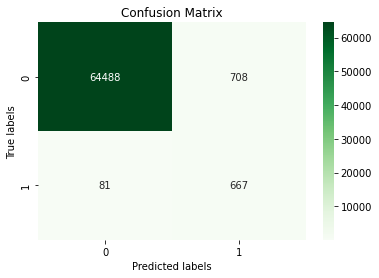

In [ ]:
ax= plt.subplot()
sns.heatmap(cm_us, annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

###Over sampling with 10 variables

In [ ]:

over_sampler = RandomOverSampler(0.5)
x_train_10os,y_train_10os = over_sampler.fit_resample(x_train10, y_train10)
print(" The number of class before thw fit {}".format(Counter((y_train10))))
print(" The number of class after thw fit {}".format(Counter((y_train_10os))))

 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 270536, 1: 135268})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
parameters_10os = {
    'C'       : [0.01, 0.1, 1]
}

In [ ]:
logreg_10os = LogisticRegression(multi_class = "multinomial",
                            max_iter = 3000)
gscv_10os = GridSearchCV(logreg_10os,                   # Model
                   param_grid = parameters_10os,  # Hyperparameters
                   scoring = 'accuracy',     # metric for scoring
                   verbose=2,
                   cv = 5)

In [ ]:
gscv_10os.fit(x_train_10os, y_train_10os)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=  14.5s
[CV] END .............................................C=0.01; total time=  21.8s
[CV] END .............................................C=0.01; total time=  13.8s
[CV] END .............................................C=0.01; total time=  17.3s
[CV] END .............................................C=0.01; total time=  16.2s
[CV] END ..............................................C=0.1; total time=  14.7s
[CV] END ..............................................C=0.1; total time=  14.4s
[CV] END ..............................................C=0.1; total time=  17.3s
[CV] END ..............................................C=0.1; total time=  18.0s
[CV] END ..............................................C=0.1; total time=  13.1s
[CV] END ................................................C=1; total time=  15.9s
[CV] END ........................................

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.01, 0.1, 1]}, scoring='accuracy', verbose=2)

In [ ]:
print("Tuner Hyperparameters : ", gscv_10os.best_params_)
print("Accuracy : ", gscv_10os.best_score_ )

Tuner Hyperparameters :  {'C': 0.1}
Accuracy :  0.965909652688279


In [ ]:
logregFinal_10os = LogisticRegression(C = 0.01,
                                 penalty = 'l2',
                                 
                                 multi_class = 'multinomial',
                                 max_iter = 500) 

In [ ]:
logregFinal_10os.fit(x_train_10os, y_train_10os)

LogisticRegression(C=0.01, max_iter=500, multi_class='multinomial')

In [ ]:
preds10_train_os = logregFinal_10os.predict(x_train_10os)
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_train_10os,preds10_train_os))

Accuracy Score:  0.9664567130930203


In [ ]:
preds10_os = logregFinal_10os.predict(x_test10)

In [ ]:
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_test10,preds10_os))

Accuracy Score:  0.9572667718063812


In [ ]:
# Create classification report
class_report_10os = classification_report(y_test10, preds10_os)
print(class_report_10os)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     65196
           1       0.20      0.95      0.34       748

    accuracy                           0.96     65944
   macro avg       0.60      0.95      0.66     65944
weighted avg       0.99      0.96      0.97     65944



In [ ]:
cm_10os = confusion_matrix(y_test10, preds10_os)

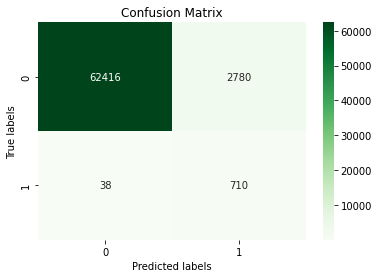

In [ ]:
ax= plt.subplot()
sns.heatmap(cm_10os, annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

###Synthetic sampling with 10 variables

In [ ]:
sm = SMOTETomek(0.5)
x_train_sm,y_train_sm = sm.fit_resample(x_train10,y_train10)
print(" The number of class before thw fit {}".format(Counter((y_train10))))
print(" The number of class after thw fit {}".format(Counter((y_train_sm))))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


 The number of class before thw fit Counter({0: 270536, 1: 2188})
 The number of class after thw fit Counter({0: 270471, 1: 135203})


In [ ]:
parameters_sm = {
    'C'       : [0.01, 0.1, 1]
}

In [ ]:
logreg_sm = LogisticRegression(multi_class = "multinomial",
                            max_iter = 10000)
gscv_sm = GridSearchCV(logreg_sm,                   # Model
                   param_grid = parameters_sm,  # Hyperparameters
                   scoring = 'accuracy',     # metric for scoring
                   verbose=2,
                   cv = 5)

In [ ]:
gscv_sm.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=  21.8s
[CV] END .............................................C=0.01; total time=  21.2s
[CV] END .............................................C=0.01; total time=  25.5s
[CV] END .............................................C=0.01; total time=  20.2s
[CV] END .............................................C=0.01; total time=  20.7s
[CV] END ..............................................C=0.1; total time=  14.3s
[CV] END ..............................................C=0.1; total time=  22.2s
[CV] END ..............................................C=0.1; total time=  26.9s
[CV] END ..............................................C=0.1; total time=  23.1s
[CV] END ..............................................C=0.1; total time=  18.6s
[CV] END ................................................C=1; total time=  13.9s
[CV] END ........................................

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.01, 0.1, 1]}, scoring='accuracy', verbose=2)

In [ ]:
print("Tuner Hyperparameters : ", gscv_sm.best_params_)
print("Accuracy : ", gscv_sm.best_score_ )

Tuner Hyperparameters :  {'C': 0.01}
Accuracy :  0.9690539707430496


In [ ]:
logregFinal_sm10 = LogisticRegression(C = 0.01,
                                 penalty = 'l2',
                                 solver = 'sag',
                                 multi_class = 'multinomial',
                                 max_iter = 500) 

In [ ]:
logregFinal_sm10.fit(x_train_sm, y_train_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.01, max_iter=500, multi_class='multinomial',
                   solver='sag')

In [ ]:
pred_train_sm10 = logregFinal_sm10.predict(x_train_sm)
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_train_sm,pred_train_sm10))

Accuracy Score:  0.9603080305861357


In [ ]:
pred_sm10 = logregFinal_sm10.predict(x_test10)

In [ ]:
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_test10,pred_sm10))

Accuracy Score:  0.9748877835739416


In [ ]:
# Create classification report
class_report_sm10 = classification_report(y_test10, pred_sm10)
print(class_report_sm10)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     65196
           1       0.30      0.93      0.46       748

    accuracy                           0.97     65944
   macro avg       0.65      0.95      0.72     65944
weighted avg       0.99      0.97      0.98     65944



In [ ]:
cm_sm10 = confusion_matrix(y_test10, pred_sm10)

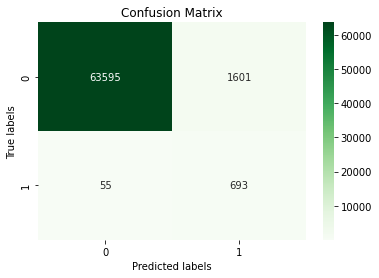

In [ ]:
ax= plt.subplot()
sns.heatmap(cm_sm10, annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

###Original data set with 23 variables

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
parameters23 = {
    'penalty' : ['l1', 'l2'],
    'C'       : [0.1, 1, 10],
    'solver'  : ['sag', 'saga']
}

In [ ]:
logreg23 = LogisticRegression(multi_class = "multinomial",
                            max_iter = 500)
gscv23 = GridSearchCV(logreg23,                   # Model
                   param_grid = parameters23,  # Hyperparameters
                   scoring = 'accuracy',     # metric for scoring
                   verbose=2,
                   cv = 3)

In [ ]:
gscv23.fit(x_train23, y_train23)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.7min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.7min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 1.7min
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.3min
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.3min
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.3min
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time= 1.4min
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time= 1.4min
[CV] END .....................C=0.1, penalty=l2,

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial'),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['sag', 'saga']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Tuner Hyperparameters : ", gscv23.best_params_)
print("Accuracy : ", gscv23.best_score_ )

Tuner Hyperparameters :  {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
Accuracy :  0.9954312785086753


In [ ]:
logregFinal23 = LogisticRegression(C = 0.1,
                                 penalty = 'l2',
                                 solver = 'sag',
                                 multi_class = 'multinomial',
                                 max_iter = 500)                                 

In [ ]:
logregFinal23.fit(x_train23, y_train23)

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial', solver='sag')

In [ ]:
train_preds23 = logregFinal23.predict(x_train23)

In [ ]:
print('Accuracy Score: ', metrics.accuracy_score(y_train23, train_preds23))

Accuracy Score:  0.9962489549874598


In [ ]:
# Predicting the test set
preds23 = logregFinal23.predict(x_test23)

In [ ]:
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_test23,preds23))

Accuracy Score:  0.9953445347567633


In [ ]:
# Create classification report
class_report23 = classification_report(y_test23, preds23)
print(class_report23)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65196
           1       0.97      0.61      0.75       748

    accuracy                           1.00     65944
   macro avg       0.98      0.80      0.87     65944
weighted avg       1.00      1.00      0.99     65944



In [ ]:
cm23 = confusion_matrix(y_test23, preds23)


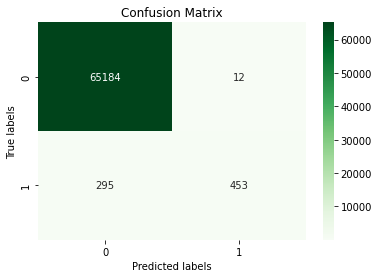

In [ ]:
ax= plt.subplot()
sns.heatmap(cm23, annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

###Under sampling with 23 variables

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 
under_sampler = RandomUnderSampler(0.8)
x_train_us23, y_train_us23 = under_sampler.fit_resample(x_train23, y_train23)
print(" The number of class before the fit {}".format(Counter((y_train23))))
print(" The number of class after the fit {}".format(Counter((y_train_us23))))

 The number of class before the fit Counter({0: 270536, 1: 2188})
 The number of class after the fit Counter({0: 2735, 1: 2188})


In [ ]:
parameters_us23 = {
    'C'       : [0.01, 0.1, 1],
    'solver'  : ['sag', 'saga']
}

In [ ]:
logreg_us23 = LogisticRegression(multi_class = "multinomial", penalty = 'l2',
                            max_iter = 10000)
gscv_us23 = GridSearchCV(logreg_us23,                   # Model
                   param_grid = parameters_us23,  # Hyperparameters
                   scoring = 'accuracy',     # metric for scoring
                   verbose=2,
                   cv = 3)

In [ ]:
gscv_us23.fit(x_train_us23, y_train_us23)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .................................C=0.01, solver=sag; total time=   7.4s
[CV] END .................................C=0.01, solver=sag; total time=   6.4s
[CV] END .................................C=0.01, solver=sag; total time=   7.7s
[CV] END ................................C=0.01, solver=saga; total time=   8.7s
[CV] END ................................C=0.01, solver=saga; total time=   7.9s
[CV] END ................................C=0.01, solver=saga; total time=  11.1s
[CV] END ..................................C=0.1, solver=sag; total time=   7.4s
[CV] END ..................................C=0.1, solver=sag; total time=   6.4s
[CV] END ..................................C=0.1, solver=sag; total time=   7.7s
[CV] END .................................C=0.1, solver=saga; total time=   8.5s
[CV] END .................................C=0.1, solver=saga; total time=   7.9s
[CV] END .................................C=0.1, 

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.01, 0.1, 1], 'solver': ['sag', 'saga']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Tuner Hyperparameters : ", gscv_us23.best_params_)
print("Accuracy : ", gscv_us23.best_score_ )

Tuner Hyperparameters :  {'C': 0.01, 'solver': 'sag'}
Accuracy :  0.9437334958358724


In [ ]:
logregFinal_us23 = LogisticRegression(C = 0.01,
                                 penalty = 'l2',
                                 solver = 'sag',
                                 multi_class = 'multinomial',
                                 max_iter = 500) 

In [ ]:
logregFinal_us23.fit(x_train_us23, y_train_us23)

LogisticRegression(C=0.01, max_iter=500, multi_class='multinomial',
                   solver='sag')

In [ ]:
preds23_train_us23 = logregFinal_us23.predict(x_train_us23)
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_train_us23,preds23_train_us23))

Accuracy Score:  0.9244363193174894


In [ ]:
preds23_us = logregFinal_us23.predict(x_test23)

In [ ]:
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_test23,preds23_us))

Accuracy Score:  0.9850479194468034


In [ ]:
# Create classification report
class_report_us23 = classification_report(y_test23, preds23_us)
print(class_report_us23)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     65196
           1       0.42      0.89      0.57       748

    accuracy                           0.99     65944
   macro avg       0.71      0.94      0.78     65944
weighted avg       0.99      0.99      0.99     65944



In [ ]:
cm_us23 = confusion_matrix(y_test23, preds23_us)

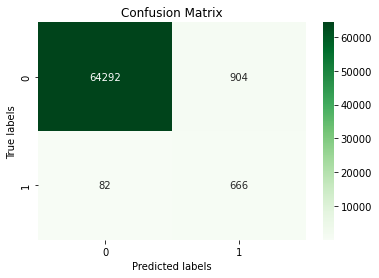

In [ ]:
ax= plt.subplot()
sns.heatmap(cm_us23, annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

###Over sampling with 23 variables

In [ ]:

over_sampler = RandomOverSampler(0.5)

x_train_os23, y_train_os23 = over_sampler.fit_resample(x_train23, y_train23)
print(" The number of class before the fit {}".format(Counter((y_train23))))
print(" The number of class after the fit {}".format(Counter((y_train_os23))))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


 The number of class before the fit Counter({0: 270536, 1: 2188})
 The number of class after the fit Counter({0: 270536, 1: 135268})


In [ ]:
parameters_os23 = {
    'C'       : [0.001, 0.01, 0.1], 
    'penalty': ['l1', 'l2']
#    'solver': ['sag', 'saga']
}

In [ ]:
logreg_os23 = LogisticRegression(multi_class = "multinomial", penalty = 'l2', solver = 'sag',
                            max_iter = 10000)
gscv_os23 = GridSearchCV(logreg_os23,                   # Model
                   param_grid = parameters_os23,  # Hyperparameters
                   scoring = 'accuracy',     # metric for scoring
                   verbose=2,
                   cv = 3)

In [ ]:
gscv_os23.fit(x_train_os23, y_train_os23)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time= 9.7min
[CV] END ................................C=0.001, penalty=l2; total time= 9.5min
[CV] END ................................C=0.001, penalty=l2; total time= 9.5min
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time= 9.3min
[CV] END .................................C=0.01, penalty=l2; total time= 9.4min
[CV] END .................................C=0.01,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver s

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial',
                                          solver='sag'),
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Tuner Hyperparameters : ", gscv_os23.best_params_)
print("Accuracy : ", gscv_os23.best_score_ )

Tuner Hyperparameters :  {'C': 0.001, 'penalty': 'l2'}
Accuracy :  0.9621418221604517


In [ ]:
logregFinal_os23 = LogisticRegression(C = 0.001,
                                 penalty = 'l2',
                                 solver = 'sag',
                                 multi_class = 'multinomial',
                                 max_iter = 500) 

In [ ]:
logregFinal_os23.fit(x_train_os23, y_train_os23)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.001, max_iter=500, multi_class='multinomial',
                   solver='sag')

In [ ]:
preds23_train_os23 = logregFinal_os23.predict(x_train_os23)
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_train_os23,preds23_train_os23))

Accuracy Score:  0.9588298784634947


In [ ]:
preds23_os = logregFinal_os23.predict(x_test23)

In [ ]:
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_test23,preds23_os))

Accuracy Score:  0.9805289336406648


In [ ]:
# Create classification report
class_report_os23 = classification_report(y_test23, preds23_os)
print(class_report_os23)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     65196
           1       0.36      0.93      0.52       748

    accuracy                           0.98     65944
   macro avg       0.68      0.95      0.75     65944
weighted avg       0.99      0.98      0.98     65944



In [ ]:
cm_os23 = confusion_matrix(y_test23, preds23_os)

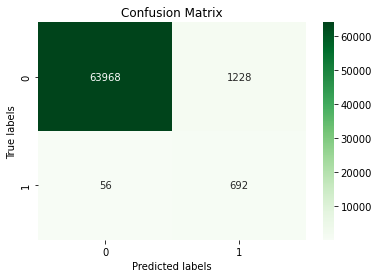

In [ ]:
ax= plt.subplot()
sns.heatmap(cm_os23, annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

###Synthetic sampling with 23 variables

In [ ]:
# sm23 = SMOTETomek(0.5)
sm23 = SMOTETomek(random_state=42)

x_train_sm23,y_train_sm23 = sm23.fit_resample(x_train23,y_train23)
print(" The number of class before thw fit {}".format(Counter((y_train23))))
print(" The number of class after thw fit {}".format(Counter((y_train_sm23))))

KeyboardInterrupt: ignored

In [ ]:
print(" The number of class after thw fit {}".format(Counter((y_train_sm23))))

 The number of class after thw fit Counter({1: 270497, 0: 270497})


In [ ]:
parameters_sm = {
    'C'       : [0.01, 0.1, 1]
}

In [ ]:
logreg_sm = LogisticRegression(multi_class = "multinomial",
                            max_iter = 10000)
gscv_sm = GridSearchCV(logreg_sm,                   # Model
                   param_grid = parameters_sm,  # Hyperparameters
                   scoring = 'accuracy',     # metric for scoring
                   verbose=2,
                   cv = 5)

In [ ]:
gscv_sm.fit(x_train_sm23, y_train_sm23)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time= 2.8min
[CV] END .............................................C=0.01; total time= 4.0min
[CV] END .............................................C=0.01; total time= 2.9min
[CV] END .............................................C=0.01; total time= 3.8min
[CV] END .............................................C=0.01; total time= 3.7min
[CV] END ..............................................C=0.1; total time= 3.4min
[CV] END ..............................................C=0.1; total time= 4.0min
[CV] END ..............................................C=0.1; total time= 2.5min
[CV] END ..............................................C=0.1; total time= 2.7min
[CV] END ..............................................C=0.1; total time= 2.0min
[CV] END ................................................C=1; total time= 2.9min
[CV] END ........................................

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.01, 0.1, 1]}, scoring='accuracy', verbose=2)

In [ ]:
print("Tuner Hyperparameters : ", gscv_sm.best_params_)
print("Accuracy : ", gscv_sm.best_score_ )

Tuner Hyperparameters :  {'C': 1}
Accuracy :  0.9615836871492924


In [ ]:
logregFinal_sm23 = LogisticRegression(C = 1,
                                 penalty = 'l2',
                                 solver = 'sag',
                                 multi_class = 'multinomial',
                                 max_iter = 500) 

In [ ]:
logregFinal_sm23.fit(x_train_sm23, y_train_sm23)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=1, max_iter=500, multi_class='multinomial', solver='sag')

In [ ]:
pred_train_sm23 = logregFinal_sm23.predict(x_train_sm23)
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_train_sm23,pred_train_sm23))

Accuracy Score:  0.9524301563418448


In [ ]:
pred_sm23 = logregFinal_sm23.predict(x_test23)

In [ ]:
# Accuracy statistics
print('Accuracy Score: ', metrics.accuracy_score(y_test23,pred_sm23))

Accuracy Score:  0.9631505519835012


In [ ]:
# Create classification report
class_report_sm23 = classification_report(y_test23, pred_sm23)
print(class_report_sm23)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     65196
           1       0.23      0.95      0.37       748

    accuracy                           0.96     65944
   macro avg       0.61      0.96      0.68     65944
weighted avg       0.99      0.96      0.97     65944



In [ ]:
cm_sm23 = confusion_matrix(y_test23, pred_sm23)

In [ ]:
cm_sm23

array([[62800,  2396],
       [   34,   714]])

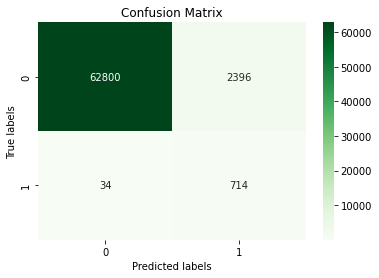

In [ ]:
ax= plt.subplot()
sns.heatmap(cm_sm23, annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# knn = KNeighborsClassifier()

In [ ]:
# n_neighbors = [5, 15, 25]
# leaf_size = [10, 20, 30]
# p = [1, 2]

In [ ]:
# grid = {
#     'n_neighbors': n_neighbors, 
#     'leaf_size': leaf_size, 
#     'p': p
# }

In [ ]:
# grid

In [ ]:
# knn_grid = GridSearchCV(
#     knn, 
#     praram_grid = grid, 
#     scoring = 'accuracy', 
#     verbose = 2,
#     cv = 5
# )

In [ ]:
# knn_grid.fit(x_train10, y_train10)